In [64]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures,FunctionTransformer, StandardScaler, OneHotEncoder 
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline, FeatureUnion, make_pipeline
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, precision_score, recall_score, accuracy_score
import seaborn as sns
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
import tensorflow as tf
from sklearn.naive_bayes import MultinomialNB,GaussianNB, BernoulliNB 
from sklearn.compose import ColumnTransformer
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.inspection import permutation_importance
from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.impute import SimpleImputer
from sklearn.model_selection import GridSearchCV
import re, itertools
from time import time
from numpy import array
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten,Input
from keras.layers import Conv1D, MaxPooling1D


# Big Title

In [65]:
path='HackathonData.csv'

# EDA

In [66]:
df = pd.read_csv(path)
df.describe()

,year,rh_num,numberdirectors,genderratio,nationalitymix,attrition,iva_company_rating_num,IVA_rating_trend,industry_adjusted_score,weighted_average_score,environmental_pillar_score,social_pillar_score,governance_pillar_score,sale,ni,roa,salesgrowth,mve,return1yr_comp,ind_num
count,10973.000000,10973.000000,10973.000000,10972.000000,10508.000000,5752.000000,10973.000000,10185.000000,10973.000000,10973.000000,10973.000000,10973.000000,10972.000000,10748.000000,10748.000000,10748.000000,10689.000000,1.092600e+04,10762.000000,10973.000000
mean,2018.037911,4.801968,9.212339,0.807996,0.120527,0.049670,3.552994,0.061463,4.380476,4.537009,4.696273,4.185683,5.317918,7790.904218,541.172157,-0.003588,0.472688,1.312586e+04,0.171177,5.413652
std,1.406142,2.020328,2.478696,0.114619,0.196326,0.059878,1.304820,0.445974,1.969199,0.845068,2.215789,1.527776,1.368263,25448.812459,2332.329163,0.198274,10.527411,4.402814e+04,1.843392,2.682993
min,2016.000000,1.000000,1.000000,0.250000,0.000000,0.000000,1.000000,-3.000000,0.000000,1.400000,0.000000,0.000000,0.000000,-875.710000,-22440.000000,-5.240366,-1.661021,1.500400e+00,-0.971121,1.000000
25%,2017.000000,3.000000,8.000000,0.727000,0.000000,0.000000,3.000000,0.000000,2.900000,4.000000,3.200000,3.200000,4.400000,406.005500,0.146500,0.000240,-0.017643,9.352118e+02,-0.146645,3.000000
50%,2018.000000,5.000000,9.000000,0.800000,0.000000,0.000000,3.000000,0.000000,4.200000,4.500000,4.600000,4.100000,5.400000,1301.306500,76.677000,0.022678,0.057456,2.539384e+03,0.063924,6.000000
75%,2019.000000,7.000000,11.000000,0.889000,0.200000,0.100000,4.000000,0.000000,5.700000,5.100000,6.300000,5.100000,6.300000,4569.744250,326.050000,0.062714,0.159433,7.834373e+03,0.296107,7.000000
max,2020.000000,7.000000,33.000000,1.000000,0.900000,0.400000,7.000000,3.000000,10.000000,8.400000,10.000000,10.000000,9.600000,556933.000000,59531.000000,1.285017,710.679487,1.966079e+06,146.444934,12.000000


In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10973 entries, 0 to 10972
Data columns (total 27 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ticker                      10973 non-null  object 
 1   companyname                 10973 non-null  object 
 2   year                        10973 non-null  int64  
 3   country                     10970 non-null  object 
 4   rh_label                    10973 non-null  object 
 5   rh_num                      10973 non-null  int64  
 6   numberdirectors             10973 non-null  int64  
 7   genderratio                 10972 non-null  float64
 8   nationalitymix              10508 non-null  float64
 9   attrition                   5752 non-null   float64
 10  iva_company_rating          10973 non-null  object 
 11  iva_company_rating_num      10973 non-null  int64  
 12  IVA_rating_trend            10185 non-null  float64
 13  iva_industry                109

In [68]:
df["ind_num"] = df["ind_num"].astype('str')

<Axes: >

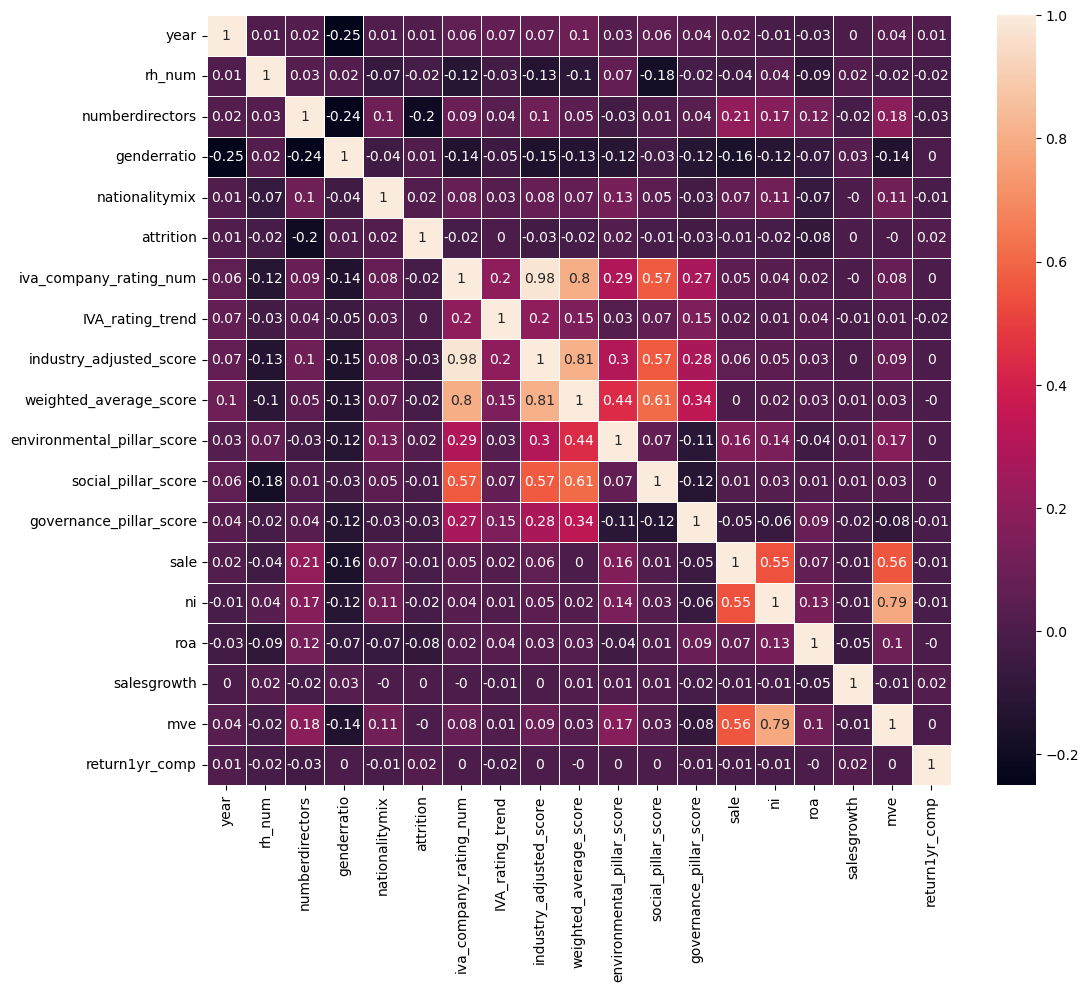

In [69]:
continuous_data = df.select_dtypes(include=['int64','float64']).columns.tolist()
corr_matrix = df[continuous_data].corr().round(2)
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot= True,linewidths=.5)
 

In [70]:
# we wont be using the following columns
df.drop(columns=['rh_label'], inplace=True, errors='ignore')
df.drop(columns=['rh_num'], inplace=True,  errors='ignore')
df.drop(columns=['Ind_label'], inplace=True,  errors='ignore')
df.drop(columns=['attrition'], inplace=True,  errors='ignore')
df.drop(columns=['iva_industry'], inplace=True,  errors='ignore')
df.drop(columns=['country'], inplace=True,  errors='ignore')
df.drop(columns=['iva_company_rating'], inplace=True,  errors='ignore')
df.drop(columns=['ind_num'], inplace=True,  errors='ignore')

In [71]:
discrete = df.select_dtypes(include=["object"]).columns.tolist()
continuous = df.select_dtypes(include=["float64", "int64"]).columns.tolist()
print("Number of Continuous columns: ",len(continuous))
print("Number of Discrete column", len(discrete))

Number of Continuous columns:  17
Number of Discrete column 2


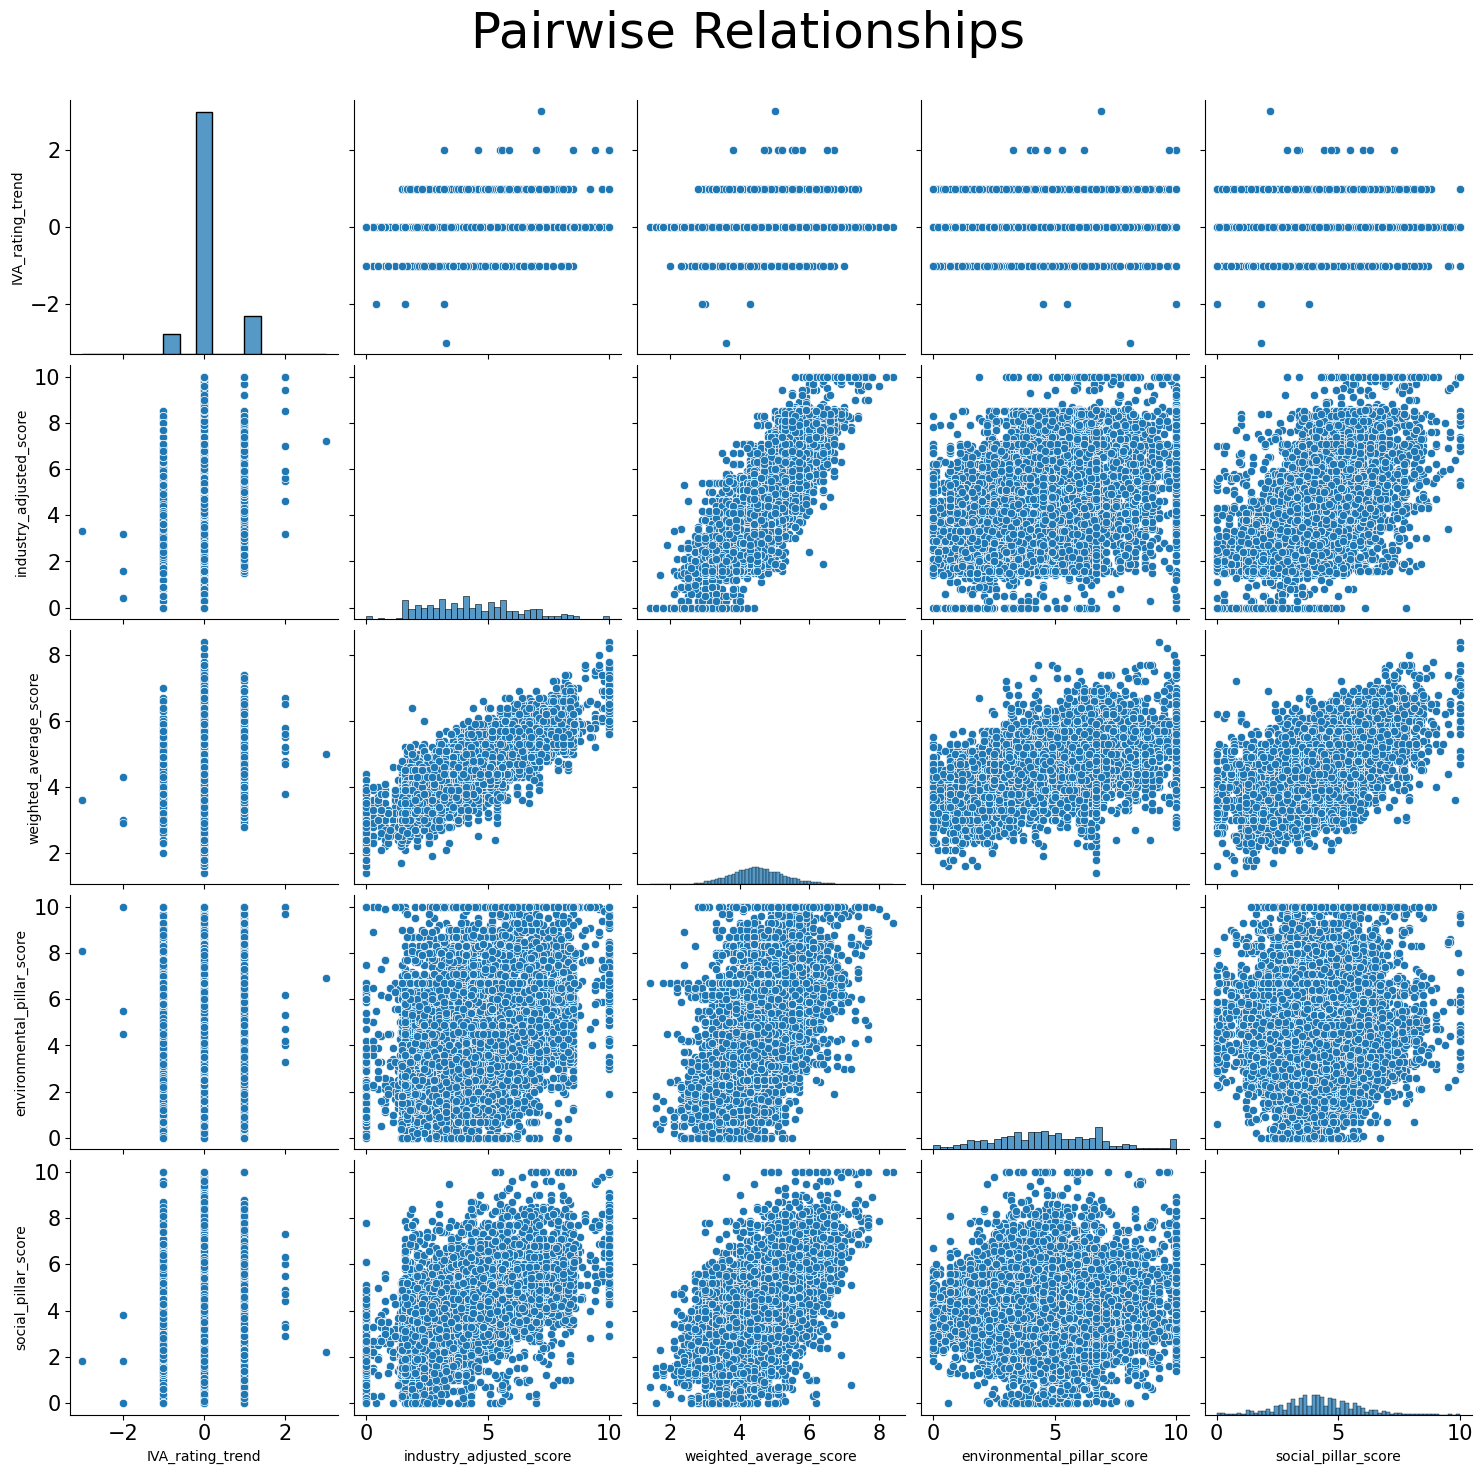

In [72]:
ax = sns.pairplot(df[continuous[5:10]],height=3)
for subplot in ax.axes.flatten():
    subplot.tick_params(labelsize=15)
plt.suptitle("Pairwise Relationships", fontsize=36)
plt.subplots_adjust(top=0.92)
plt.show()

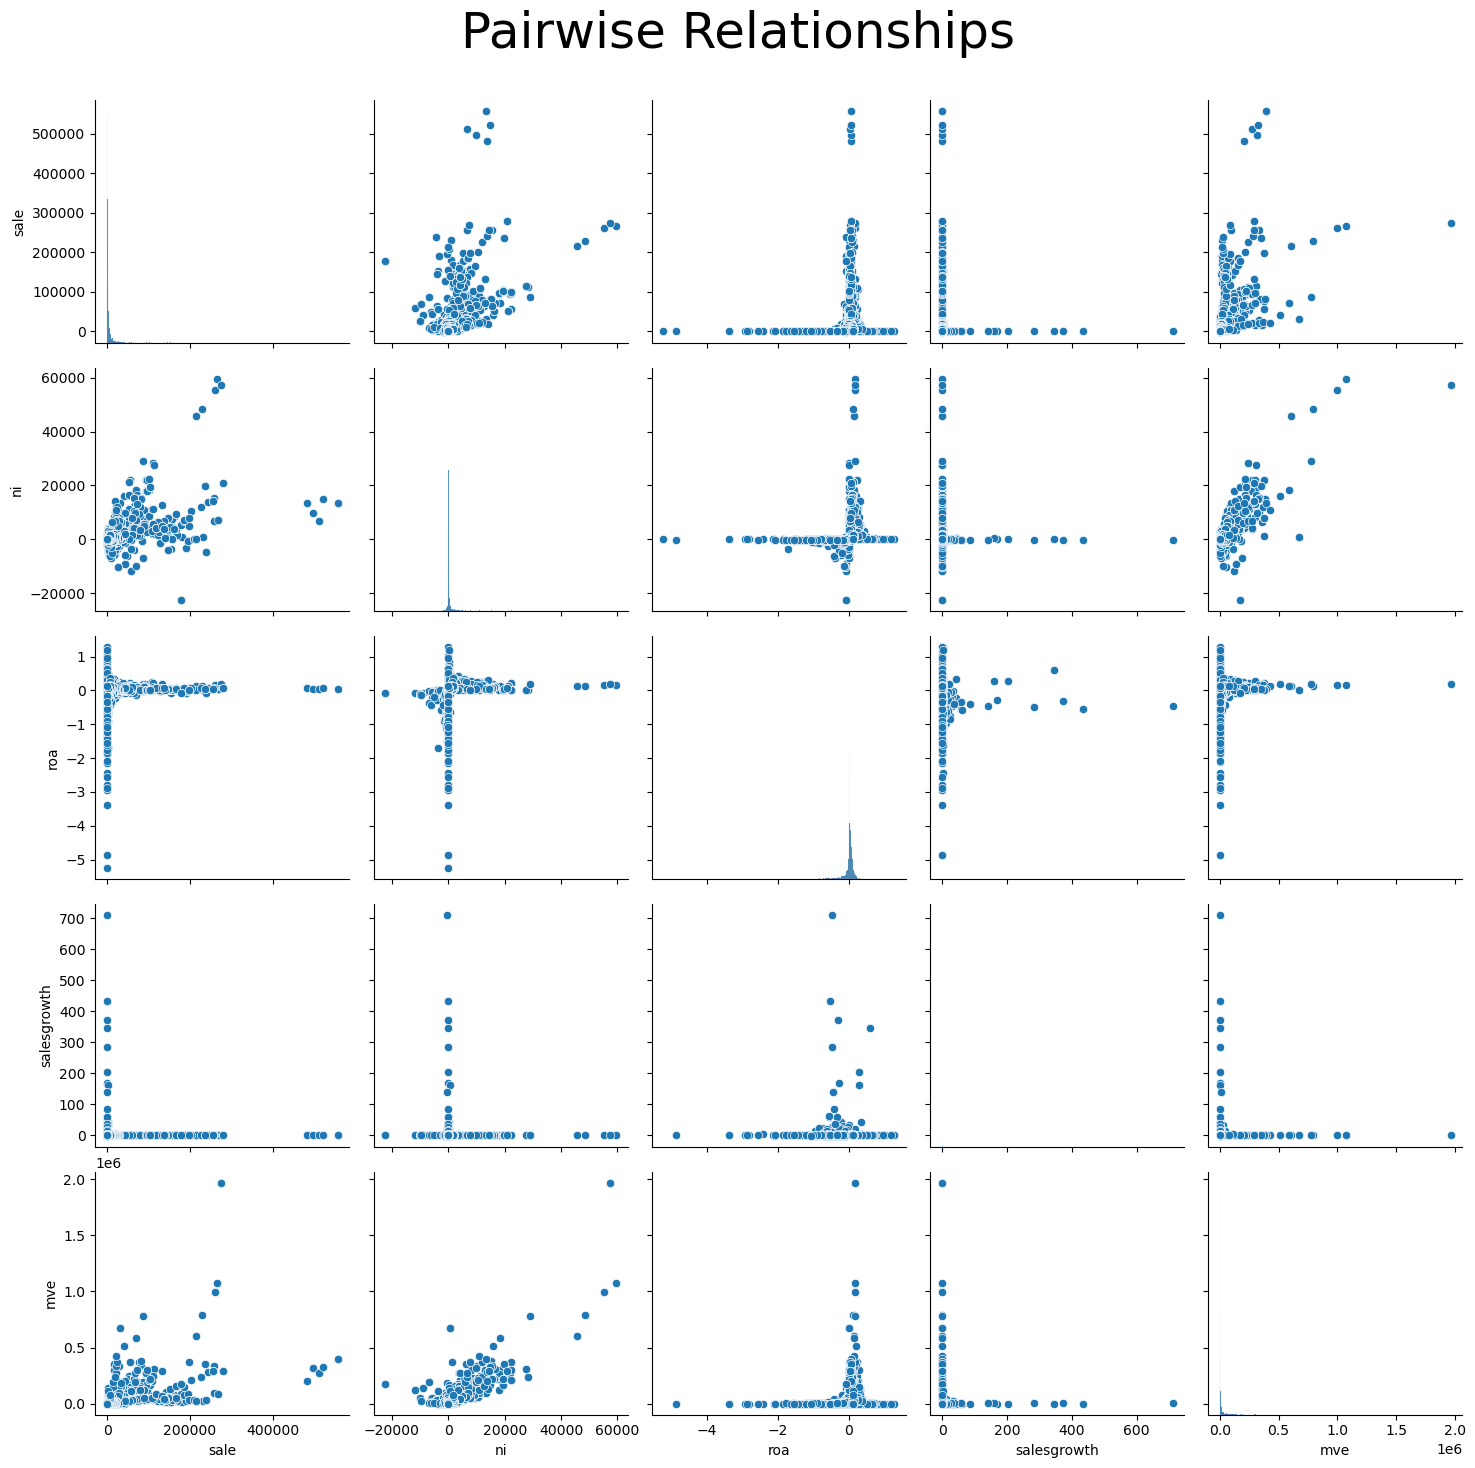

In [73]:
ax = sns.pairplot(df[continuous[11:16]],height=3)
for subplot in ax.axes.flatten():
    subplot.tick_params()
plt.suptitle("Pairwise Relationships", fontsize=36)
plt.subplots_adjust(top=0.92)
plt.show()

# Timeseries Classification Neural Network

LSTMs focus on long term time dependencies, they work great with sequential data which is why they are a popular choice for stock market prediction. While our data includes many stock market listed companies we will instead focus on the availanble data to simplify a prediction problem into a binary classification problem using our time-sensitive data. In the following review we will focus on predicting whether the Market Value of equity, how much investors are willing to pay for a company's stock, will be above or below average based on the iva_company_rating_num, genderratio, and salesgrowth performance of the past 3 years, making our neural network a multivariate time series binary classification model.

In [109]:
pd.to_datetime(df['year'].astype(str), format='%Y')
df =df.sort_values(by='year')

In [110]:
# Selecting Companies that have the data we need
df_by_company = df.groupby('ticker')["year"].count().reset_index()
df_by_ticker_year = df_by_company[df_by_company["year"]>3]

mve_scaler = StandardScaler()
df["mve"] = mve_scaler.fit_transform(np.array(df["mve"]).reshape(-1,1)) 

## Feature Selection and Preprocessing

In [111]:
usable_companies = df_by_ticker_year["ticker"]
filtered_df = df[df["ticker"].isin(usable_companies)]
x = []
y = []
window_size =3
 
values_we_want_to_find_relationship = ["iva_company_rating_num", "genderratio", "salesgrowth"]
filtered_df =filtered_df[values_we_want_to_find_relationship +['mve'] ]
for unique_ticker in usable_companies:
    instances = df[df["ticker"] == unique_ticker].reset_index(drop=True)
    
    instances_y =  instances["mve"].values
    instances = instances[values_we_want_to_find_relationship]
    
    num_instances = len(instances)
    for start in range(num_instances - window_size):
        # 
        _x = np.array(instances.iloc[start:start+window_size]) # grab the first 3 instances
        _y = np.array( [1,0] if instances_y[start+window_size] > filtered_df["mve"].mean() else [0,1])
        if not np.isnan(_x).any() and not np.isnan(_y).any():

            x.append(_x)
            y.append(_y)
            

In [112]:
mve_mean = filtered_df['mve'].mean()
mve_median = filtered_df['mve'].median()
 
print("Number of values above the mean: ", len(filtered_df[filtered_df['mve'] >mve_mean ]))
print("Number of values above the median: ",len(filtered_df[filtered_df['mve'] >mve_median ]))

Number of values above the mean:  1721
Number of values above the median:  4750


In [113]:
y = np.array(y) #.flatten()
print("Output data shape: ",y.shape)
X = np.array(x)
print("Input data shape: ", X.shape)

n_steps = 3
n_features = 3

Output data shape:  (4527, 2)
Input data shape:  (4527, 3, 3)


In [114]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [139]:
train_dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train))
val_dataset = tf.data.Dataset.from_tensor_slices((X_test, y_test))
batch_size = 12

## Model Training

In [192]:
model = Sequential()
model.add(Input(shape=(n_steps, n_features)))
model.add(LSTM(units = 512, return_sequences=True)) # 128 100dense-> 0.75
model.add(LSTM(units = 128)) 
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(2, activation='softmax'))


"\n43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 876us/step - accuracy: 0.7597 - loss: 0.4804\nTest accuracy: 0.7718911170959473 model.fit(X_train, y_train, epochs=100, verbose=2) batch size 32\n\n\n43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7612 - loss: 0.4913 \nTest accuracy: 0.7726269364356995 384 48 100epo \n\n3/43 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7597 - loss: 0.5119\nTest accuracy: 0.775570273399353  512  64\n\n43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7567 - loss: 0.5308\nTest accuracy: 0.7748344540596008\n\n\n43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7606 - loss: 0.5246\nTest accuracy: 0.7763060927391052  \nmodel = Sequential()\nmodel.add(Input(shape=(n_steps, n_features)))\nmodel.add(LSTM(units = 512, return_sequences=True)) # 128 100dense-> 0.75\nmodel.add(LSTM(units = 32)) \nmodel.add(Dropout(0.5))\nmodel.add(Dense(64, activation='relu'))\nmodel.add(Dense(8, activation='relu'))\nmodel.add(Dense(2, activation='softmax'))\n100\n\n43/43 ━━━━━━━━━━━━

In [193]:
# fit model
from tensorflow.keras.optimizers import Adam
optimizer = Adam(learning_rate=0.002)
model.compile(optimizer='adam', loss='categorical_crossentropy',metrics=["accuracy"])
model.fit(X_train, y_train, epochs=100, verbose=2)

Epoch 1/100
99/99 - 2s - 16ms/step - accuracy: 0.7645 - loss: 0.5538
Epoch 2/100
99/99 - 1s - 9ms/step - accuracy: 0.7642 - loss: 0.5283
Epoch 3/100
99/99 - 1s - 9ms/step - accuracy: 0.7639 - loss: 0.5216
Epoch 4/100
99/99 - 1s - 9ms/step - accuracy: 0.7642 - loss: 0.5211
Epoch 5/100
99/99 - 1s - 9ms/step - accuracy: 0.7642 - loss: 0.5169
Epoch 6/100
99/99 - 1s - 9ms/step - accuracy: 0.7648 - loss: 0.5158
Epoch 7/100
99/99 - 1s - 9ms/step - accuracy: 0.7667 - loss: 0.5077
Epoch 8/100
99/99 - 1s - 9ms/step - accuracy: 0.7617 - loss: 0.5038
Epoch 9/100
99/99 - 1s - 9ms/step - accuracy: 0.7633 - loss: 0.5050
Epoch 10/100
99/99 - 1s - 9ms/step - accuracy: 0.7655 - loss: 0.4993
Epoch 11/100
99/99 - 1s - 9ms/step - accuracy: 0.7629 - loss: 0.4997
Epoch 12/100
99/99 - 1s - 9ms/step - accuracy: 0.7664 - loss: 0.4930
Epoch 13/100
99/99 - 1s - 9ms/step - accuracy: 0.7645 - loss: 0.4956
Epoch 14/100
99/99 - 1s - 10ms/step - accuracy: 0.7645 - loss: 0.4948
Epoch 15/100
99/99 - 1s - 10ms/step - acc

In [194]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print('Test accuracy:', test_acc)

43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7689 - loss: 0.5233
Test accuracy: 0.7836644649505615


Our model is very prone to overfitting when the number of training epochs exceeds 100. At higher epochs, the training accuracy reaches a perfect 1/1, yet it does not perform nearly as well on the test (unseen) data. The current model seems to have reached convergence with the current arquitecture at 100 epochs since it generalizes well having obtained an accuracy of 0.79 in the training data, and 0.78 on the test data, performing decently. Our loss function was cross entropy, which returns a probability distribution, which signals that the probability assigned for the correct response was always above 58%. 

The performance of the model could be further improved with aditional preprocessing, particularly the removal of the multiple outliers which while neural networks are not as sensible to , could be making it harder for the model to learn certain patterns. Sequential data is tricky specially since it involves forecasting future values, yet with the rapid overfitting of this deep neural network it would be worthwhile to try a few less complex and less expensive approaches for timeseries predictions such as CNNs, ARIMA and other Statistical methods. 

It is also worth highlighting that a model is as good as the data it is trained on, and the data this model is trained on has a big class imbalance, which the model might be trying to imitate. This imbalance would negatively affect the accuracy specially since the negative class the favoured class by this imbalance. Moreover, the exploratory data analysis revealed that none of the features had a high correlation with the target variable or any discernible type of relationship. These findings prompt two interesting points for future research: How much impact is time is having on our predictions? What is the performance of much simpler algorithms on our data.  



# A review of Machine Learning  Classification Algorithms

In the following section we will be building a pipeline to compare the performance of different machine learning algorithms while dealing with am imbalanced class problem. While not highlighted above, this is an imbalanced class problem since we are focusing on whether the target variable is above or below average and not the median. For the mean our target variable has an approximate distribution of 25% to 75% across the classes, while we could apply certain techniques like undersampling or oversampling, or even more novel data generation techniques, such as generative models like Boltzman Machine, our main objective will be to focus on how our data performs as classification model, and which model, upon finetuning, optimizing and application of other techniques, could have the highest potential of achieving similar performance to the model above when trying to reformat it for forecasting classification.  

In [62]:
df = pd.read_csv(path)

In [22]:
df["ind_num"] = df["ind_num"].astype('str')
df_ml = pd.DataFrame(df.loc[:, ~df.columns.isin(['attrition'])])
df_ml.dropna(inplace=True)
# naive bayes requires cat
mve_mean = df_ml['mve'].mean()
y = np.where(df_ml['mve'] > mve_mean,1,0)
df_ml['year'] = df_ml['year'].astype('str')

chosen_features = ['year','return1yr_comp','social_pillar_score','governance_pillar_score','environmental_pillar_score','genderratio', 'nationalitymix','numberdirectors','ni'] 
X = df_ml[chosen_features].copy()
numerical_features = X.select_dtypes(include= ['int64','float64']).columns.tolist()
categorical_features = X.select_dtypes(include= ['object']).columns.tolist()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Total yes:  1724


## Building the Pipelines

In [23]:
estimators = [  {'clf': [BernoulliNB()]},
                {'clf': [ComplementNB()]},
                {'clf': [MultinomialNB()]},
                {'clf': [LogisticRegression()]},
                {'clf': [DecisionTreeClassifier()]},
                {'clf': [KNeighborsClassifier()]},
                {'clf': [GaussianNB()]}]
num_pipeline = Pipeline([ 
    ('fillna', SimpleImputer(strategy="median")),
    ('scale', MinMaxScaler()),
])

cat_pipeline = Pipeline([
    ('input',SimpleImputer(strategy="constant")),
    ('one_hot', OneHotEncoder()),
    ])

 
data_pipeline = ColumnTransformer(transformers= [
        # (name, transformer,     columns)
        ('num',num_pipeline, numerical_features),
        ('cat', cat_pipeline, categorical_features)
])

 
final_pipeline = Pipeline([
        ("preparation", data_pipeline), 
        ('clf', None)
])  

 
scoring = {
    'accuracy': 'accuracy',
    'precision_macro': 'precision_macro',
    'recall_macro': 'recall_macro'
}

In [24]:
grid_search = GridSearchCV(final_pipeline, param_grid=estimators,cv=5, n_jobs=-1, scoring=scoring, refit='accuracy',)
t0 = time()
grid_search.fit(X_train,y_train)
 

best_parameters = grid_search.best_estimator_.get_params()
print(f"Best model is {grid_search.best_params_}")
mean_accuracy = grid_search.best_score_
print(f"Mean accuracy of best model: {mean_accuracy:.4f}")
results_df = pd.DataFrame(grid_search.cv_results_)
results_df_box = results_df.copy().T

# Show Results of Analysos
best_pipeline = grid_search.best_estimator_
y_pred = best_pipeline.predict(X_test)
print(f"test_acc on heldout test set by best pipeline is: {accuracy_score(y_pred, y_test):.3f}")
untouched_results_df= results_df.copy()
results_df[["mean_score_time","param_clf", "mean_test_precision_macro","std_test_precision_macro","mean_test_accuracy","std_test_accuracy","mean_test_recall_macro","std_test_recall_macro",]].set_index('param_clf')
 

Best model is {'clf': GaussianNB()}
Mean accuracy of best model: 0.9181
test_acc on heldout test set by best pipeline is: 0.917


/opt/anaconda3/envs/tensorflow/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/envs/tensorflow/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/envs/tensorflow/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", le

,mean_score_time,mean_test_precision_macro,std_test_precision_macro,mean_test_accuracy,std_test_accuracy,mean_test_recall_macro,std_test_recall_macro
param_clf,,,,,,,
BernoulliNB(),0.004647,0.608683,0.246782,0.817200,0.007590,0.500575,0.001047
ComplementNB(),0.003235,0.587065,0.010550,0.652047,0.009503,0.638469,0.013307
MultinomialNB(),0.003343,0.408600,0.003588,0.817200,0.007177,0.500000,0.000000
LogisticRegression(),0.004676,0.832764,0.011220,0.861847,0.004281,0.653503,0.012568
DecisionTreeClassifier(),0.004280,0.858958,0.005848,0.916502,0.004016,0.863930,0.008109
KNeighborsClassifier(),0.049667,0.742329,0.019654,0.840641,0.005198,0.644226,0.008680
GaussianNB(),0.003140,0.892015,0.012384,0.918082,0.001556,0.821091,0.019957


### Feature Importance

In [25]:
model_fi = permutation_importance(best_pipeline, X,y)
imp_df = pd.DataFrame(model_fi['importances_mean'].reshape(1,9),columns= chosen_features)
imp_df #error_score‘raise’ 

,year,return1yr_comp,social_pillar_score,governance_pillar_score,environmental_pillar_score,genderratio,nationalitymix,numberdirectors,ni
0,-0.000084,0.000147,0.000632,0.000316,0.00217,0.000885,0.001391,0.002592,0.167804


In [28]:
 
print(f"\nTest accuracy with best pipeline is: {accuracy_score(y_pred, y_test):.3f}")
print(f"Test recall with best pipeline is: {recall_score(y_test, y_pred, pos_label=1, average='binary'):.3f}")
print(f"Test precision with best pipeline is: {precision_score(y_test, y_pred, pos_label=1, average='binary'):.3f}")


Test accuracy with best pipeline is: 0.917
Test recall with best pipeline is: 0.664
Test precision with best pipeline is: 0.835


When testing the pipeline to classify whether the MVE is below or above average, we observe a severe class imbalance made particularly evident once we have access to the extrinsic metrics. Our best performing model achieved a 0.91 accuracy. Although one might assume that due to this class imbalance our model would classify most instances as below average mve(the majority class), a closer look at our extrinsic metrics reveals that the model actually performs quite well for both recall and precision. This implies that most (0.84) of the classified as above average mve actually had an above average mve and few (0.35) were missclassified as having below average mve when they actually had an above average mve. The chosen model was Gaussian Naive Bayes, which is interesting since it is a probability based model nototious for preserving statistical structure, robustness to noise and perhaps most importantly less likely to overfit. Gaussian in particularly focusing focuses on the distribution of the data.

In [181]:
ct = pd.crosstab(gender_ratio_qualitative, y_train)
print(ct)

col_0          0     1
row_0                 
less women  3173   372
more women  3032  1016


In [200]:
gender_ratio_mean = df_ml["genderratio"].mean()
mve_mean = df_ml['mve'].mean()
gender_ratio_qualitative = np.where(df_ml["genderratio"]>gender_ratio_mean,"less women", "more women" )
y_train_qualitative = np.where(df_ml["mve"]>mve_mean,"Above mean", "Below mean" )
print(len(gender_ratio_qualitative))
print(len(y_train_qualitative))

9492
9492


col_0       Above mean  Below mean
row_0                             
less women         455        3978
more women        1269        3790


Text(0.5, 1.0, 'Mosaic Plot for Below/Above avg MVE and Above/ Below average gender ratio')

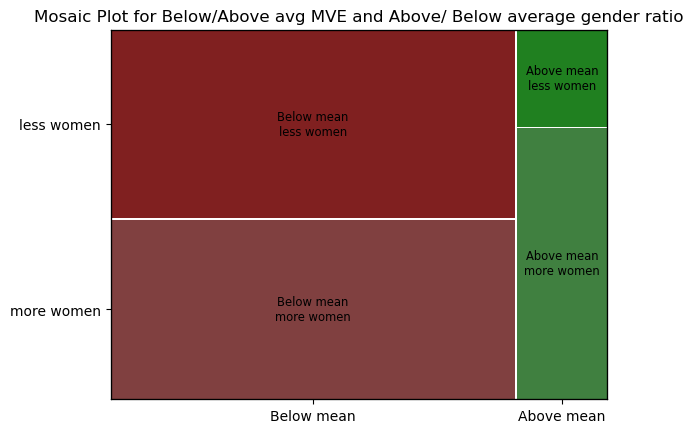

In [203]:
import matplotlib.pyplot as plt
from statsmodels.graphics.mosaicplot import mosaic
temp =  pd.DataFrame(gender_ratio_qualitative, columns=['genderratio',])
temp["mve"] = y_train_qualitative
ct = pd.crosstab(gender_ratio_qualitative, y_train_qualitative)
print(ct)
mosaic(temp, ['mve','genderratio'])
plt.title("Mosaic Plot for Below/Above avg MVE and Above/ Below average gender ratio")
